<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Sarima_arima_of_turbidity5day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df=pd.read_csv('turbidity.csv')
df.head()

,created_at,Turbiidity
0,2022-02-05 07:03:27 UTC,2774.93
1,2022-02-05 07:03:49 UTC,3000.00
2,2022-02-05 07:04:10 UTC,3000.00
3,2022-02-05 07:04:31 UTC,3000.00
4,2022-02-05 07:04:52 UTC,3000.00


In [71]:
df.tail()

,created_at,Turbiidity
118,2022-02-08 06:31:51 UTC,3000.00
119,2022-02-08 06:32:18 UTC,3000.00
120,2022-02-08 06:32:46 UTC,3004.29
121,2022-02-08 06:33:13 UTC,3000.00
122,2022-02-08 06:33:40 UTC,3000.00


In [72]:
df.colunms=["created_at	","Turbiidity"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,Turbiidity
0,2022-02-05 07:03:27 UTC,2774.93
1,2022-02-05 07:03:49 UTC,3000.00
2,2022-02-05 07:04:10 UTC,3000.00
3,2022-02-05 07:04:31 UTC,3000.00
4,2022-02-05 07:04:52 UTC,3000.00


In [73]:
df.tail()

,created_at,Turbiidity
118,2022-02-08 06:31:51 UTC,3000.00
119,2022-02-08 06:32:18 UTC,3000.00
120,2022-02-08 06:32:46 UTC,3004.29
121,2022-02-08 06:33:13 UTC,3000.00
122,2022-02-08 06:33:40 UTC,3000.00


In [74]:
df['created_at']=pd.to_datetime(df["created_at"])

In [75]:
df.head()

,created_at,Turbiidity
0,2022-02-05 07:03:27+00:00,2774.93
1,2022-02-05 07:03:49+00:00,3000.00
2,2022-02-05 07:04:10+00:00,3000.00
3,2022-02-05 07:04:31+00:00,3000.00
4,2022-02-05 07:04:52+00:00,3000.00


In [76]:
df.set_index("created_at",inplace=True)

In [77]:
df.head()

,Turbiidity
created_at,
2022-02-05 07:03:27+00:00,2774.93
2022-02-05 07:03:49+00:00,3000.00
2022-02-05 07:04:10+00:00,3000.00
2022-02-05 07:04:31+00:00,3000.00
2022-02-05 07:04:52+00:00,3000.00


In [78]:
df.shape

(123, 1)

In [79]:
df.describe()

,Turbiidity
count,123.000000
mean,2995.078862
std,27.990846
min,2774.930000
25%,3000.000000
50%,3000.000000
75%,3000.000000
max,3004.290000


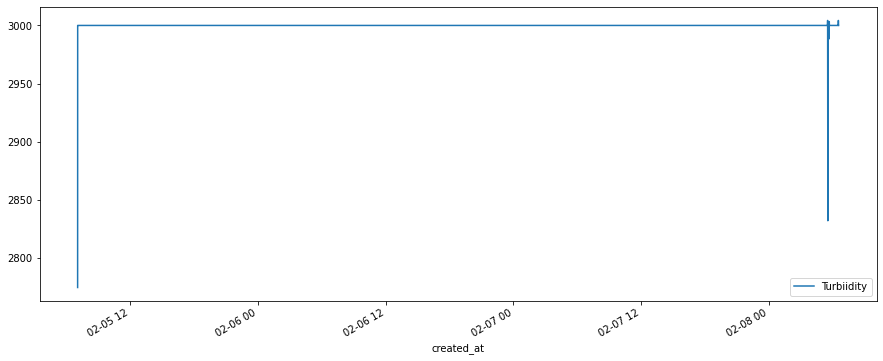

In [80]:
df.plot(figsize=(15,6))
plt.show()

In [81]:
from statsmodels.tsa.stattools import adfuller

In [82]:
test_result=adfuller(df['Turbiidity'])

In [83]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Turbiidity):
    result=adfuller(Turbiidity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [84]:
adfuller_test(df['Turbiidity'])

ADF Test Statistic : -3.845742065660677
p-value : 0.0024724977911027807
#Lags Used : 6
Number of Observations Used : 116
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [85]:
df['Turbiidity First Difference'] = df['Turbiidity'] - df['Turbiidity'].shift(1)

In [86]:
df['Turbiidity'].shift(1)

created_at
2022-02-05 07:03:27+00:00        NaN
2022-02-05 07:03:49+00:00    2774.93
2022-02-05 07:04:10+00:00    3000.00
2022-02-05 07:04:31+00:00    3000.00
2022-02-05 07:04:52+00:00    3000.00
                              ...   
2022-02-08 06:31:51+00:00    3000.00
2022-02-08 06:32:18+00:00    3000.00
2022-02-08 06:32:46+00:00    3000.00
2022-02-08 06:33:13+00:00    3004.29
2022-02-08 06:33:40+00:00    3000.00
Name: Turbiidity, Length: 123, dtype: float64

In [87]:
df['Seasonal First Difference']=df['Turbiidity']-df['Turbiidity'].shift(12)

In [88]:
df.head(14)

,Turbiidity,Turbiidity First Difference,Seasonal First Difference
created_at,,,
2022-02-05 07:03:27+00:00,2774.93,NaN,NaN
2022-02-05 07:03:49+00:00,3000.00,225.07,NaN
2022-02-05 07:04:10+00:00,3000.00,0.00,NaN
2022-02-05 07:04:31+00:00,3000.00,0.00,NaN
2022-02-05 07:04:52+00:00,3000.00,0.00,NaN
2022-02-05 07:05:13+00:00,3000.00,0.00,NaN
2022-02-05 07:05:34+00:00,3000.00,0.00,NaN
2022-02-05 07:05:56+00:00,3000.00,0.00,NaN
2022-02-05 07:06:32+00:00,3000.00,0.00,NaN


In [89]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.4058788345370905
p-value : 0.00028980181489767393
#Lags Used : 9
Number of Observations Used : 101
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


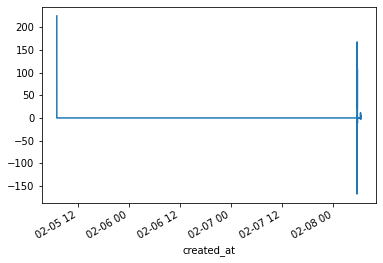

In [90]:
df['Seasonal First Difference'].plot()

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


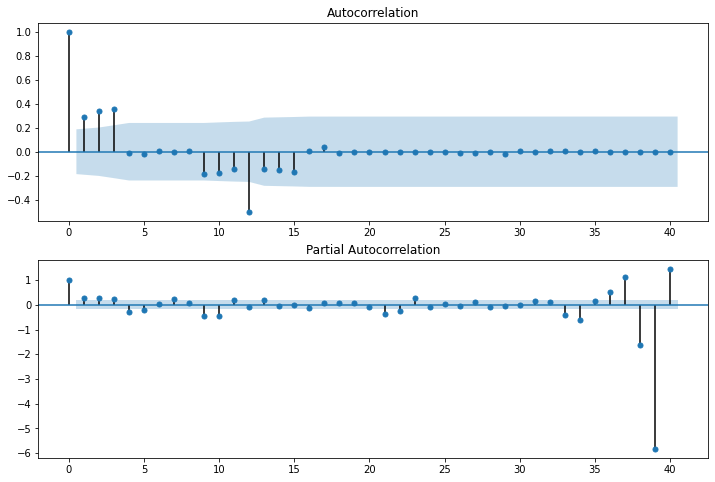

In [93]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [94]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [95]:
model=ARIMA(df['Turbiidity'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [96]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Turbiidity   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -578.912
Method:                       css-mle   S.D. of innovations             27.776
Date:                Sat, 26 Mar 2022   AIC                           1165.823
Time:                        03:47:05   BIC                           1177.039
Sample:                             1   HQIC                          1170.379
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8332      1.141      0.730      0.467      -1.403       3.069
ar.L1.D.Turbiidity    -0.2604      0.224     -1.163      0.247      -0.699       0.178
ma.L1.D.Turbiidity    -0.4434      0.224     -1.979      0.050      -0.883      -0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.8403           +0.0000j            3.8403            0.5000
MA.1            2.2552           +0.0000j            2.2552            0.0000
-----------------------------------------------------------------------------
"""

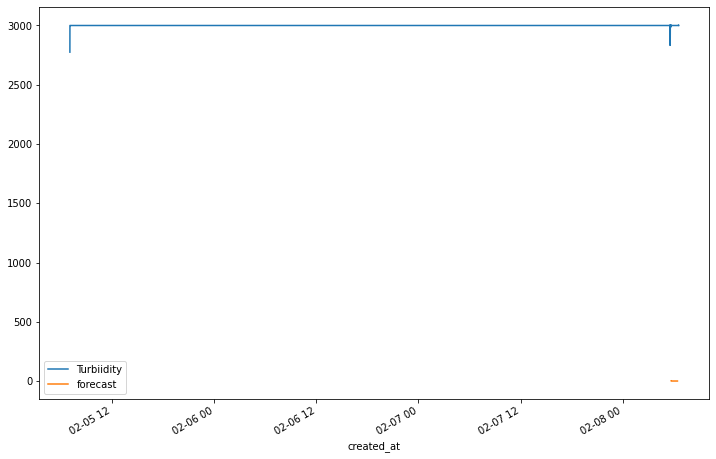

In [97]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Turbiidity','forecast']].plot(figsize=(12,8))

In [98]:
import statsmodels.api as sm

In [99]:
model=sm.tsa.statespace.SARIMAX(df['Turbiidity'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


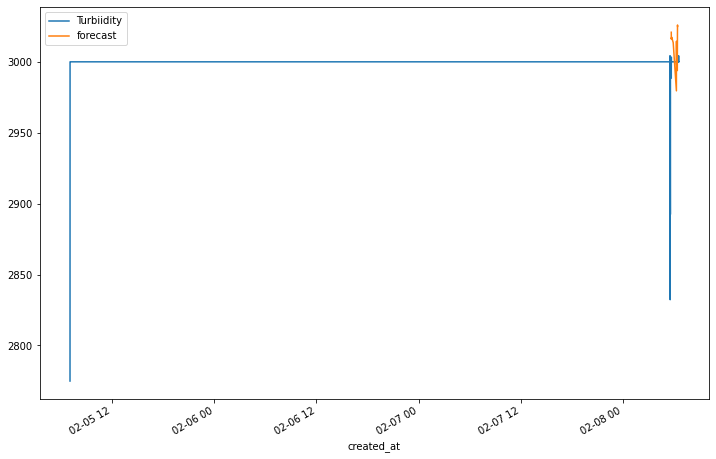

In [100]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Turbiidity','forecast']].plot(figsize=(12,8))

In [101]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [102]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [103]:
future_datest_df.tail()

,Turbiidity,Turbiidity First Difference,Seasonal First Difference,forecast
2023-09-08 06:33:40+00:00,NaN,NaN,NaN,NaN
2023-10-08 06:33:40+00:00,NaN,NaN,NaN,NaN
2023-11-08 06:33:40+00:00,NaN,NaN,NaN,NaN
2023-12-08 06:33:40+00:00,NaN,NaN,NaN,NaN
2024-01-08 06:33:40+00:00,NaN,NaN,NaN,NaN


In [104]:
future_df=pd.concat([df,future_datest_df])

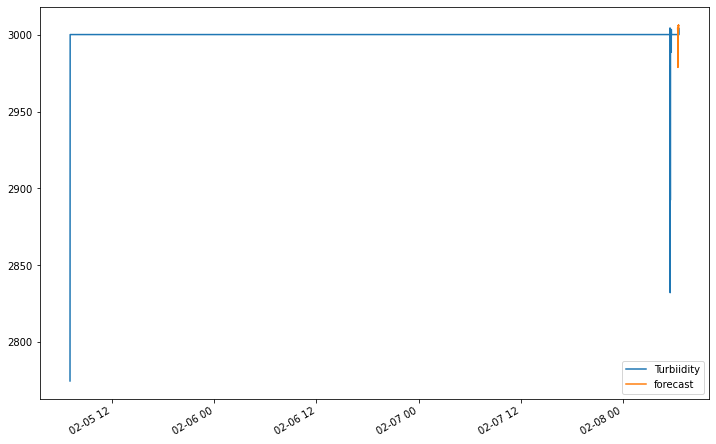

In [105]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Turbiidity', 'forecast']].plot(figsize=(12, 8)) 